In [1]:
#ANN

In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.neural_network import MLPClassifier

In [12]:
digits = load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [13]:
X = digits.data
y = digits.target

In [15]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


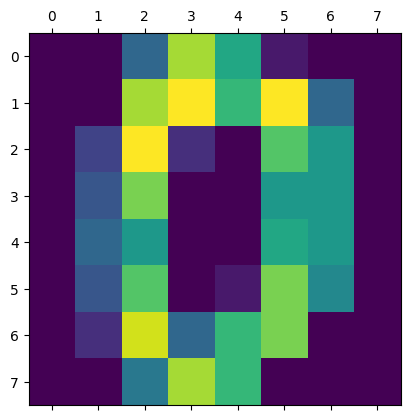

In [18]:
import matplotlib.pyplot as plt
plt.matshow(digits.images[0])
plt.show()

In [20]:
x_vars_stdscle = StandardScaler().fit_transform(X)
x_train,x_test,y_train,y_test =train_test_split(x_vars_stdscle,y,train_size = 0.7,random_state=42)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report

In [23]:
pipeline = Pipeline([('mlp',MLPClassifier(hidden_layer_sizes= (100,50,), activation='relu',solver='adam',alpha=0.0001,max_iter=300 ))]) #pipelining multiple processing steps and models into a single object.

In [24]:
parameters = {'mlp__alpha':(0.001,0.01,0.1,0.3,0.5,1.0), 'mlp__max_iter':(100,200,300)} # creating a dictionary parameters

In [25]:
grid_search_nn = GridSearchCV(pipeline,parameters,n_jobs=-1,cv=5,verbose=1, scoring='accuracy') # n_jobs: The number of CPU cores to use for parallelizing the search.
                                                                                                #cv states about Cross validation. verbose= printing progress and scoring says about accuracy

grid_search_nn.fit(x_train,y_train) #fitting the gridsearch

print ('\n\nNeural Network Best Training score: %0.3f' %grid_search_nn.best_score_)#geting the best score
print ('\nNeural Network Best parameters set:') 

best_parameters = grid_search_nn.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


Neural Network Best Training score: 0.971

Neural Network Best parameters set:
	mlp__alpha: 0.01
	mlp__max_iter: 200


In [26]:
#predicting training and testing values
predictions_train = grid_search_nn.predict(x_train)
predictions_test = grid_search_nn.predict(x_test)

#printing accuracy,classification report and confusion matrix
print ("\nNeural Network Training accuracy:",round(accuracy_score(y_train, predictions_train),4))
print ("\nNeural Network Complete report of Training data\n",classification_report(y_train, predictions_train))
print ("\n\nNeural Network Grid Search- Train Confusion Matrix\n\n",pd.crosstab(y_train, predictions_train,rownames = ["Actuall"],colnames = ["Predicted"]))


Neural Network Training accuracy: 1.0

Neural Network Complete report of Training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       132
           2       1.00      1.00      1.00       130
           3       1.00      1.00      1.00       129
           4       1.00      1.00      1.00       121
           5       1.00      1.00      1.00       116
           6       1.00      1.00      1.00       128
           7       1.00      1.00      1.00       124
           8       1.00      1.00      1.00       131
           9       1.00      1.00      1.00       121

    accuracy                           1.00      1257
   macro avg       1.00      1.00      1.00      1257
weighted avg       1.00      1.00      1.00      1257



Neural Network Grid Search- Train Confusion Matrix

 Predicted    0    1    2    3    4    5    6    7    8    9
Actuall                              

In [27]:
#testing with predicted x value and y_test
print ("\n\nNeural Network Testing accuracy:",round(accuracy_score(y_test, predictions_test),4))
print ("\nNeural Network Complete report of Testing data\n",classification_report( y_test, predictions_test))
print ("\n\nNeural Network Grid Search- Test Confusion Matrix\n\n",pd.crosstab(y_test, predictions_test,rownames = ["Actuall"],colnames = ["Predicted"]))



Neural Network Testing accuracy: 0.9833

Neural Network Complete report of Testing data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       0.98      1.00      0.99        47
           3       1.00      0.96      0.98        54
           4       0.98      1.00      0.99        60
           5       0.95      0.95      0.95        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.98      0.98      0.98        43
           9       0.97      0.98      0.97        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



Neural Network Grid Search- Test Confusion Matrix

 Predicted   0   1   2   3   4   5   6   7   8   9
Actuall                                       